<a href="https://colab.research.google.com/github/zakaria-bourouba/Data_Science/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install ta
 !pip install yfinance
 import pandas as pd
 import yfinance as yf
 import glob
 import ta
 from sklearn.preprocessing import MinMaxScaler
 from xgboost import XGBRegressor
 from sklearn.metrics import mean_absolute_error, mean_squared_error
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.linear_model import LinearRegression
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import GridSearchCV

# **1.1 Création du dataset pour la régression**

In [ ]:
ratios = {
"forwardPE": [],
"beta": [],
"priceToBook": [],
"priceToSales": [],
"dividendYield": [],
"trailingEps": [],
"debtToEquity": [],
"currentRatio": [],
"quickRatio": [],
"returnOnEquity": [],
"returnOnAssets": [],
"operatingMargins": [],
"profitMargins": []
}

companies = {
"Baidu": "BIDU",
"JD.com": "JD",
"BYD": "BYDDY",
"ICBC": "1398.HK",
"Toyota": "TM",
"SoftBank": "9984.T",
"Nintendo": "NTDOY",
"Hyundai": "HYMTF",
"Reliance Industries": "RELIANCE.NS",
"Tata Consultancy Services": "TCS.NS",
"Apple": "AAPL",
"Microsoft": "MSFT",
"Amazon": "AMZN",
"Alphabet": "GOOGL",
"Meta": "META",
"Tesla": "TSLA",
"NVIDIA": "NVDA",
"Samsung": "005930.KS",
"Tencent": "TCEHY",
"Alibaba": "BABA",
"IBM": "IBM",
"Intel": "INTC",
"Oracle": "ORCL",
"Sony": "SONY",
"Adobe": "ADBE",
"Netflix": "NFLX",
"AMD": "AMD",
"Qualcomm": "QCOM",
"Cisco": "CSCO",
"JP Morgan": "JPM",
"Goldman Sachs": "GS",
"Visa": "V",
"Johnson & Johnson": "JNJ",
"Pfizer": "PFE",
"ExxonMobil": "XOM",
"ASML": "ASML.AS",
"SAP": "SAP.DE",
"Siemens": "SIE.DE",
"Louis Vuitton (LVMH)": "MC.PA",
"TotalEnergies": "TTE.PA",
"Shell": "SHEL.L"
}

In [ ]:
for c in companies:
  ticker = yf.Ticker(companies[c])
  for r in ratios:
    ratios[r].append(ticker.info.get(r))

In [ ]:
df_ratios = pd.DataFrame(ratios)
df_ratios

# on met le nom des companies en index
df_ratios.index = companies.keys()
df_ratios

,forwardPE,beta,priceToBook,priceToSales,dividendYield,trailingEps,debtToEquity,currentRatio,quickRatio,returnOnEquity,returnOnAssets,operatingMargins,profitMargins
Baidu,7.215961,0.322,0.104864,None,NaN,8.98,27.969,2.086,1.754,0.08852,0.03200,0.11757,0.17848
JD.com,8.578503,0.537,0.215378,None,2.72,3.66,28.653,1.291,0.883,0.14650,0.03727,0.02687,0.03569
BYD,29.987260,0.459,1.605401,None,0.99,3.77,20.363,0.747,0.469,0.23822,0.03934,0.04722,0.05180
ICBC,4.842592,0.254,0.511341,None,12.22,1.04,NaN,NaN,NaN,0.09453,0.00785,0.62361,0.55401
Toyota,10.641001,0.241,0.061236,None,3.28,26.20,107.389,1.215,1.018,0.14547,0.03349,0.09808,0.10906
SoftBank,22.726810,0.615,0.803733,None,0.66,580.19,137.406,0.765,0.573,0.10550,0.00811,0.08754,0.12289
Nintendo,8.060747,0.379,0.007462,None,1.64,0.47,NaN,4.446,3.758,0.12366,0.06039,0.29124,0.25927
Hyundai,NaN,0.963,0.000094,None,6.07,16.41,131.158,1.456,1.160,0.12202,0.02860,0.06053,0.07149
Reliance Industries,16.965204,0.566,2.012887,None,0.42,51.09,37.464,NaN,NaN,NaN,NaN,0.12754,0.07362
Tata Consultancy Services,20.891520,0.451,10.678656,None,1.76,134.73,8.469,2.624,2.415,0.48669,0.24498,0.24474,0.19344


In [ ]:
close_prices = pd.DataFrame()

for name, ticker in companies.items():
    try:
        data = yf.download(ticker, start="2019-01-01", end="2024-01-01")['Close']
        close_prices[name] = data
    except Exception as e:
        print(f"Erreur pour {name} ({ticker}) : {e}")

close_prices.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Baidu,JD.com,BYD,ICBC,Toyota,SoftBank,Nintendo,Hyundai,Reliance Industries,Tata Consultancy Services,...,Visa,Johnson & Johnson,Pfizer,ExxonMobil,ASML,SAP,Siemens,Louis Vuitton (LVMH),TotalEnergies,Shell
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,162.250000,19.300501,11.989724,3.510701,116.279999,NaN,6.706,23.856865,502.008759,1700.328247,...,127.274887,107.296333,31.420738,51.719860,129.131546,79.184364,71.230904,231.248001,31.651243,2334.295410
2019-01-03,154.710007,18.465689,11.415542,3.517167,114.650002,NaN,6.650,23.856865,495.815338,1679.685547,...,122.688309,105.591354,30.541670,50.925762,123.758095,76.727203,69.320847,222.438110,31.379883,2335.293701
2019-01-04,160.949997,20.207907,11.853478,3.568890,119.730003,3388.630371,6.730,23.856865,498.492340,1659.263428,...,127.973946,107.363533,31.239111,52.803394,125.599342,78.665649,72.037048,229.285172,32.163452,2361.722900
2019-01-07,162.600006,20.652534,11.872941,3.581820,121.279999,3512.825928,6.882,23.856865,501.260101,1677.873413,...,130.281525,106.674820,31.406212,53.077976,128.736969,78.829453,71.092903,228.874313,32.088818,2361.722900
2019-01-08,163.399994,20.824938,12.505517,3.568890,122.309998,3712.494141,6.948,23.856865,501.214722,1674.027466,...,130.990128,109.152504,31.551508,53.463909,127.872658,80.058022,71.376160,236.040909,32.020981,2352.746582


In [ ]:
returns = close_prices.pct_change().dropna()
returns

<ipython-input-12-68c204bf5073>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = close_prices.pct_change().dropna()


,Baidu,JD.com,BYD,ICBC,Toyota,SoftBank,Nintendo,Hyundai,Reliance Industries,Tata Consultancy Services,...,Visa,Johnson & Johnson,Pfizer,ExxonMobil,ASML,SAP,Siemens,Louis Vuitton (LVMH),TotalEnergies,Shell
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,0.010252,0.022003,0.001642,0.003623,0.012946,0.036651,0.022585,0.000000,0.005552,0.011216,...,0.018032,-0.006415,0.005349,0.005200,0.024981,0.002082,-0.013106,-0.001792,-0.002320,0.000000
2019-01-08,0.004920,0.008348,0.053279,-0.003610,0.008493,0.056840,0.009590,0.000000,-0.000091,-0.002292,...,0.005439,0.023227,0.004626,0.007271,-0.006714,0.015585,0.003984,0.031312,-0.002114,-0.003801
2019-01-09,0.019829,0.032244,-0.035020,0.030797,0.004987,0.014411,0.021877,0.000000,0.005522,-0.003485,...,0.011769,-0.007926,-0.002072,0.005274,0.035851,0.013755,0.003663,0.011603,0.013348,0.006995
2019-01-10,0.010262,-0.012241,-0.019355,0.000000,0.012773,-0.037417,-0.017183,0.000000,-0.002926,0.000848,...,0.001878,0.006050,-0.023766,-0.005109,-0.006099,0.002916,0.001217,-0.009176,-0.004809,0.006946
2019-01-11,-0.013306,-0.022222,-0.004112,0.003515,0.004659,0.014363,-0.001433,0.000000,-0.008533,-0.024357,...,-0.004399,0.000308,0.013472,-0.004580,0.004567,-0.004920,-0.012454,-0.003280,-0.017122,-0.012751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.024403,-0.013938,0.009770,0.000000,-0.012883,0.000831,-0.001641,-0.004819,0.000976,0.009637,...,-0.004277,0.004004,0.003179,0.001769,0.001465,0.004797,-0.002374,-0.007667,0.004839,0.003715
2023-12-26,-0.000610,0.000725,0.012711,0.000000,0.007394,0.012450,0.009039,-0.012591,0.005068,-0.007440,...,0.002825,0.004374,0.000352,0.002257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-27,-0.002442,0.005071,-0.001499,0.016304,0.004837,0.042302,0.016287,0.029917,0.003413,0.004123,...,-0.000888,0.001345,0.007040,-0.004699,0.001902,0.011574,0.004403,-0.003118,0.002729,-0.004091


In [ ]:
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns)

scaled_returns_df = pd.DataFrame(scaled_returns, index=returns.index, columns=returns.columns)
scaled_returns_df


,Baidu,JD.com,BYD,ICBC,Toyota,SoftBank,Nintendo,Hyundai,Reliance Industries,Tata Consultancy Services,...,Visa,Johnson & Johnson,Pfizer,ExxonMobil,ASML,SAP,Siemens,Louis Vuitton (LVMH),TotalEnergies,Shell
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,0.297816,0.633229,-0.004215,0.272635,0.842956,1.321521,1.213693,-0.032206,0.244177,0.669030,...,0.984010,-0.541023,0.316429,0.208256,1.046831,0.085796,-0.726164,-0.156157,-0.148519,-0.014051
2019-01-08,0.138203,0.225655,1.514484,-0.280239,0.542570,2.066795,0.493480,-0.032206,-0.054378,-0.194929,...,0.268512,1.830155,0.273544,0.304261,-0.371631,0.866751,0.164539,1.643103,-0.138227,-0.188207
2019-01-09,0.584517,0.938920,-1.082471,2.349776,0.306107,0.500539,1.174419,-0.032206,0.242582,-0.271245,...,0.628176,-0.661887,-0.123938,0.211705,1.533306,0.760890,0.147783,0.571881,0.632606,0.306447
2019-01-10,0.298115,-0.388900,-0.621752,-0.004302,0.831271,-1.412674,-0.990334,-0.032206,-0.204398,0.005901,...,0.066202,0.456104,-1.411138,-0.269630,-0.344135,0.133997,0.020305,-0.557494,-0.272582,0.304225
2019-01-11,-0.407406,-0.686810,-0.173439,0.264356,0.283960,0.498771,-0.117449,-0.032206,-0.501045,-1.606206,...,-0.290473,-0.003196,0.798405,-0.245133,0.133218,-0.319166,-0.692190,-0.237034,-0.886429,-0.598308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.739613,-0.439552,0.234843,-0.004302,-0.899361,-0.000760,-0.128951,-0.131694,0.002030,0.568050,...,-0.283535,0.292448,0.187670,0.049217,-0.005601,0.242815,-0.166836,-0.475501,0.208397,0.156189
2023-12-26,-0.027346,-0.001878,0.321343,-0.004302,0.468436,0.428168,0.462907,-0.292127,0.218562,-0.524175,...,0.119978,0.322044,0.019931,0.071812,-0.071166,-0.034634,-0.043108,-0.058764,-0.032833,-0.014051
2023-12-27,-0.082181,0.127836,-0.096585,1.241974,0.295988,1.530138,0.864604,0.585385,0.131015,0.215397,...,-0.090959,0.079728,0.416744,-0.250652,0.013938,0.634762,0.186342,-0.228220,0.103204,-0.201513


In [ ]:
split_index = int(len(scaled_returns_df) * 0.8)

X_train = scaled_returns_df.iloc[:split_index]
X_test = scaled_returns_df.iloc[split_index:]


In [ ]:
def create_target_features(df, n_days=30):
    x = []
    y = []
    for i in range(n_days, df.shape[0]):
        x.append(df[i - n_days:i, 0])  # les 30 derniers jours (features)
        y.append(df[i, 0])             # le jour suivant (label)
    x = np.array(x)
    y = np.array(y)
    return x, y


In [ ]:
# On choisit un actif — ici Apple — pour l'exemple
target_asset = 'Apple'

# On récupère sa colonne "Close" et on transforme en tableau NumPy
data = close_prices[[target_asset]].dropna().values  # shape (n_samples, 1)

# Nombre de jours pour les features (fenêtre glissante)
n_days = 30

# Création des datasets
X, y = create_target_features(data, n_days=n_days)

# Affichage très utile pour vérifier
print("Shape des features X :", X.shape)  # Devrait être (nb_samples, 30)
print("Shape des labels y :", y.shape)    # Devrait être (nb_samples,)


Shape des features X : (1228, 30)
Shape des labels y : (1228,)


In [ ]:
def prepare_dataset_for_regression(close_series, n_days=30, split_ratio=0.8):
    # Étape 1: Calcul des rendements
    returns = close_series.pct_change().dropna().values.reshape(-1, 1)

    # Étape 2: Standardisation
    scaler = StandardScaler()
    scaled_returns = scaler.fit_transform(returns)

    # Étape 3: Création des features et labels
    X, y = create_target_features(scaled_returns, n_days=n_days)

    # Étape 4: Séparation train/test
    split_index = int(len(X) * split_ratio)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    return X_train, X_test, y_train, y_test, scaler


In [ ]:
#Exemple
close_series = close_prices['Apple']
X_train, X_test, y_train, y_test, scaler = prepare_dataset_for_regression(close_series, n_days=30)


## **1.2 Algorithmes de régression**

##XG Boost

In [ ]:
def train_xgboost(X_train, y_train):
    model = XGBRegressor(objective='reg:squarederror')
    params = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1]
    }
    grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_score_, grid.best_params_

##Random Forest

In [ ]:
def train_random_forest(X_train, y_train):
    model = RandomForestRegressor()
    params = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }
    grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_score_, grid.best_params_

##K-Nearest Neighbors Regressor

In [ ]:
def train_knn(X_train, y_train):
    model = KNeighborsRegressor()
    params = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # distance de Manhattan (p=1) ou euclidienne (p=2)
    }
    grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_score_, grid.best_params_

##Régression linéaire

In [ ]:
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    params = {
        'fit_intercept': [True, False],
        'positive': [False, True]
    }
    grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_score_, grid.best_params_

In [ ]:
model, score, params = train_xgboost(X_train, y_train)
print("Best score:", score)
print("Best params:", params)

Best score: -1.1351719058478136
Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [ ]:
def evaluate_model(model, X_test, y_test, scaler=None):
    # Prédictions
    y_pred = model.predict(X_test)

    # Si les données étaient standardisées, on les "déscale"
    if scaler:
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()
        y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

    # Calcul des erreurs
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("MSE :", mse)
    print("RMSE :", rmse)

    return mse, rmse, y_test, y_pred


In [ ]:
def run_all_models(X_train, y_train, X_test, y_test, scaler=None):
    model_functions = {
        "XGBoost": train_xgboost,
        "Random Forest": train_random_forest,
        "KNN": train_knn,
        "Linear Regression": train_linear_regression
    }

    results = {}

    for name, train_func in model_functions.items():
        print(f"\n🔧 Entraînement du modèle : {name}")
        model, score, params = train_func(X_train, y_train)

        # Appel de evaluate_model
        mse, rmse, y_test_inv, y_pred_inv = evaluate_model(model, X_test, y_test, scaler)

        print(f"✅ {name} → MSE : {mse:.4f}, RMSE : {rmse:.4f}")

        results[name] = {
            "model": model,
            "mse": mse,
            "rmse": rmse,
            "params": params,
            "y_test": y_test_inv,
            "y_pred": y_pred_inv
        }

    # Trouver le meilleur modèle (basé sur RMSE)
    best_model_name = min(results, key=lambda k: results[k]['rmse'])
    best = results[best_model_name]

    print(f"\n🏆 Meilleur modèle : {best_model_name}")
    print(f"👉 RMSE : {best['rmse']:.4f}, MSE : {best['mse']:.4f}")
    print(f"🛠  Meilleurs paramètres : {best['params']}")

    return best_model_name, best['model'], best




In [ ]:
best_model_name, best_model, best_result = run_all_models(X_train, y_train, X_test, y_test, scaler)



🔧 Entraînement du modèle : XGBoost
MSE : 0.00015431459516802436
RMSE : 0.012422342579724018
✅ XGBoost → MSE : 0.0002, RMSE : 0.0124

🔧 Entraînement du modèle : Random Forest
MSE : 0.00015734516419879194
RMSE : 0.012543730075172694
✅ Random Forest → MSE : 0.0002, RMSE : 0.0125

🔧 Entraînement du modèle : KNN
MSE : 0.00018312842104534658
RMSE : 0.013532495004445654
✅ KNN → MSE : 0.0002, RMSE : 0.0135

🔧 Entraînement du modèle : Linear Regression
MSE : 0.00016018267550919858
RMSE : 0.012656329464311467
✅ Linear Regression → MSE : 0.0002, RMSE : 0.0127

🏆 Meilleur modèle : XGBoost
👉 RMSE : 0.0124, MSE : 0.0002
🛠  Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [ ]:
def plot_predictions_vs_real(real_series, y_train_len, y_pred, label='Prédictions', n_days=30):
    """
    real_series : toutes les vraies valeurs (ex : close ou returns, non-scalées)
    y_train_len : longueur du jeu d'entraînement (pour placer la prédiction dans le temps)
    y_pred      : les prédictions du modèle à afficher
    label       : nom du modèle pour la légende
    n_days      : taille de la fenêtre utilisée dans create_target_features (important pour aligner)
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(range(len(real_series)), real_series, color='red', label='Valeurs réelles')
    ax.plot(range(y_train_len + n_days, y_train_len + n_days + len(y_pred)), y_pred,
            color='blue', label=label)

    ax.set_title('Comparaison : Prédictions vs Réel')
    ax.set_xlabel('Temps')
    ax.set_ylabel('Prix ou rendement')
    ax.legend()
    plt.tight_layout()
    plt.show()


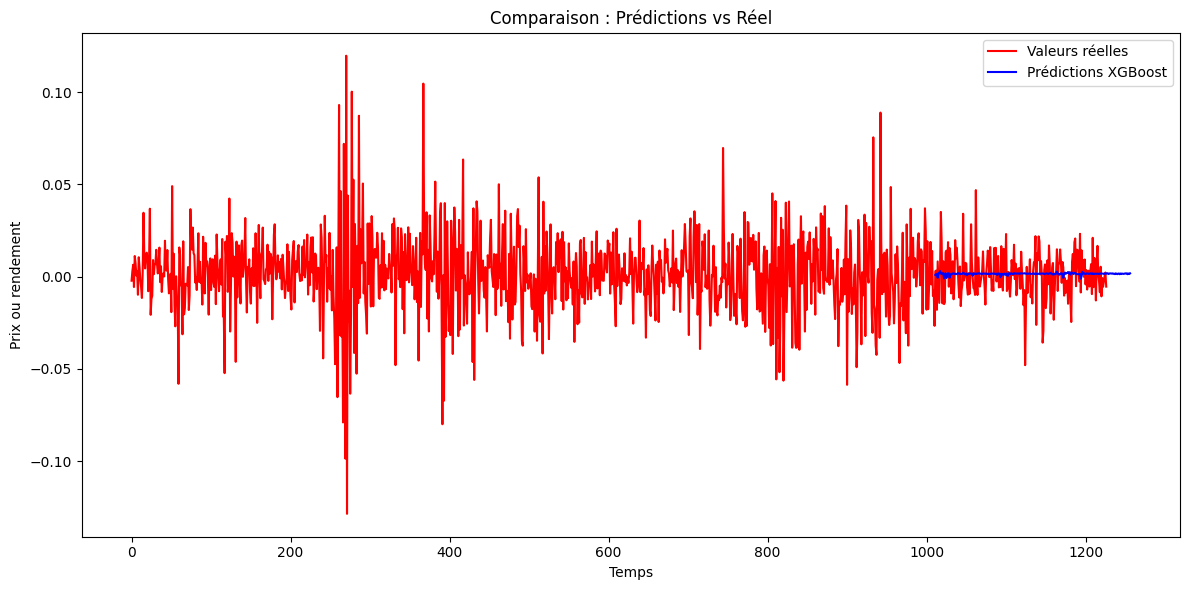

In [ ]:
# Exemple avec Apple, modèle gagnant issu de run_all_models
real_returns = close_prices['Apple'].pct_change().dropna().values[n_days:]  # pour être aligné avec X et y

plot_predictions_vs_real(
    real_series=real_returns,
    y_train_len=len(y_train),
    y_pred=best_result['y_pred'],
    label=f'Prédictions {best_model_name}',
    n_days=30
)
